# 处理csv文件, 组合年月份

In [7]:
import pandas as pd

# 加载CSV文件
file_path = './google_angle_timeline.csv'
data = pd.read_csv(file_path)

In [8]:
data

,FID,lon,lat,year,month,panoid,north_angle
0,16.0,114.173463,22.276560,2009.0,1.0,oE2WqdseBqw-V4Rhw8k3BQ,85.341957
1,16.0,114.173463,22.276560,2011.0,7.0,DUyfZjEPqLEzmN3apvjaVA,263.737579
2,16.0,114.173463,22.276560,2016.0,11.0,u20dt0MeQo_zENVdbo7QNg,261.292206
3,16.0,114.173463,22.276560,2019.0,5.0,IkpRopsXatBW16BN5W9sfA,263.524048
4,16.0,114.173463,22.276560,2020.0,11.0,Jn0W3-gydFUlv3EuUp4aGA,264.256866
...,...,...,...,...,...,...,...
1454629,365221.0,114.125981,22.528678,2022.0,7.0,grLrQ7DGHKJVrX1DBGMMfA,46.396202
1454630,365222.0,114.125981,22.528678,2019.0,8.0,5DWec-HR5UX-NR9JC79ClQ,226.352585
1454631,365222.0,114.125981,22.528678,2020.0,11.0,cfQ06x0TVSoXA0e6D7kJdg,45.910904
1454632,365222.0,114.125981,22.528678,2021.0,7.0,YbYifXVLxl8CGNX3_Ir0Uw,226.292023


In [9]:
# Function to format year and month, handling NaN values
def format_year_month(row):
    if pd.notna(row['year']) and pd.notna(row['month']):
        year = int(row['year'])
        month = int(row['month'])
        return f"{year}{month:02d}"
    else:
        return None  # Or some placeholder

# Apply the function across the dataframe
data['year_month'] = data.apply(format_year_month, axis=1)

# Save the modified dataframe
data.to_csv('./google_angle_timeline_modified.csv', index=False)


# 查看生成结果

In [10]:
# 加载CSV文件
file_path = './google_angle_timeline_modified.csv'
data = pd.read_csv(file_path)

In [11]:
data

,FID,lon,lat,year,month,panoid,north_angle,year_month
0,16.0,114.173463,22.276560,2009.0,1.0,oE2WqdseBqw-V4Rhw8k3BQ,85.341957,200901.0
1,16.0,114.173463,22.276560,2011.0,7.0,DUyfZjEPqLEzmN3apvjaVA,263.737579,201107.0
2,16.0,114.173463,22.276560,2016.0,11.0,u20dt0MeQo_zENVdbo7QNg,261.292206,201611.0
3,16.0,114.173463,22.276560,2019.0,5.0,IkpRopsXatBW16BN5W9sfA,263.524048,201905.0
4,16.0,114.173463,22.276560,2020.0,11.0,Jn0W3-gydFUlv3EuUp4aGA,264.256866,202011.0
...,...,...,...,...,...,...,...,...
1454629,365221.0,114.125981,22.528678,2022.0,7.0,grLrQ7DGHKJVrX1DBGMMfA,46.396202,202207.0
1454630,365222.0,114.125981,22.528678,2019.0,8.0,5DWec-HR5UX-NR9JC79ClQ,226.352585,201908.0
1454631,365222.0,114.125981,22.528678,2020.0,11.0,cfQ06x0TVSoXA0e6D7kJdg,45.910904,202011.0
1454632,365222.0,114.125981,22.528678,2021.0,7.0,YbYifXVLxl8CGNX3_Ir0Uw,226.292023,202107.0


# fig8

In [18]:
# 导入所需的库
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# 设置matplotlib以支持中文字符显示
plt.rcParams['font.sans-serif'] = ['Times New Roman']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号无法显示的问题

## 绘制google平台

2008-12-01 00:00:00 2023-11-01 00:00:00


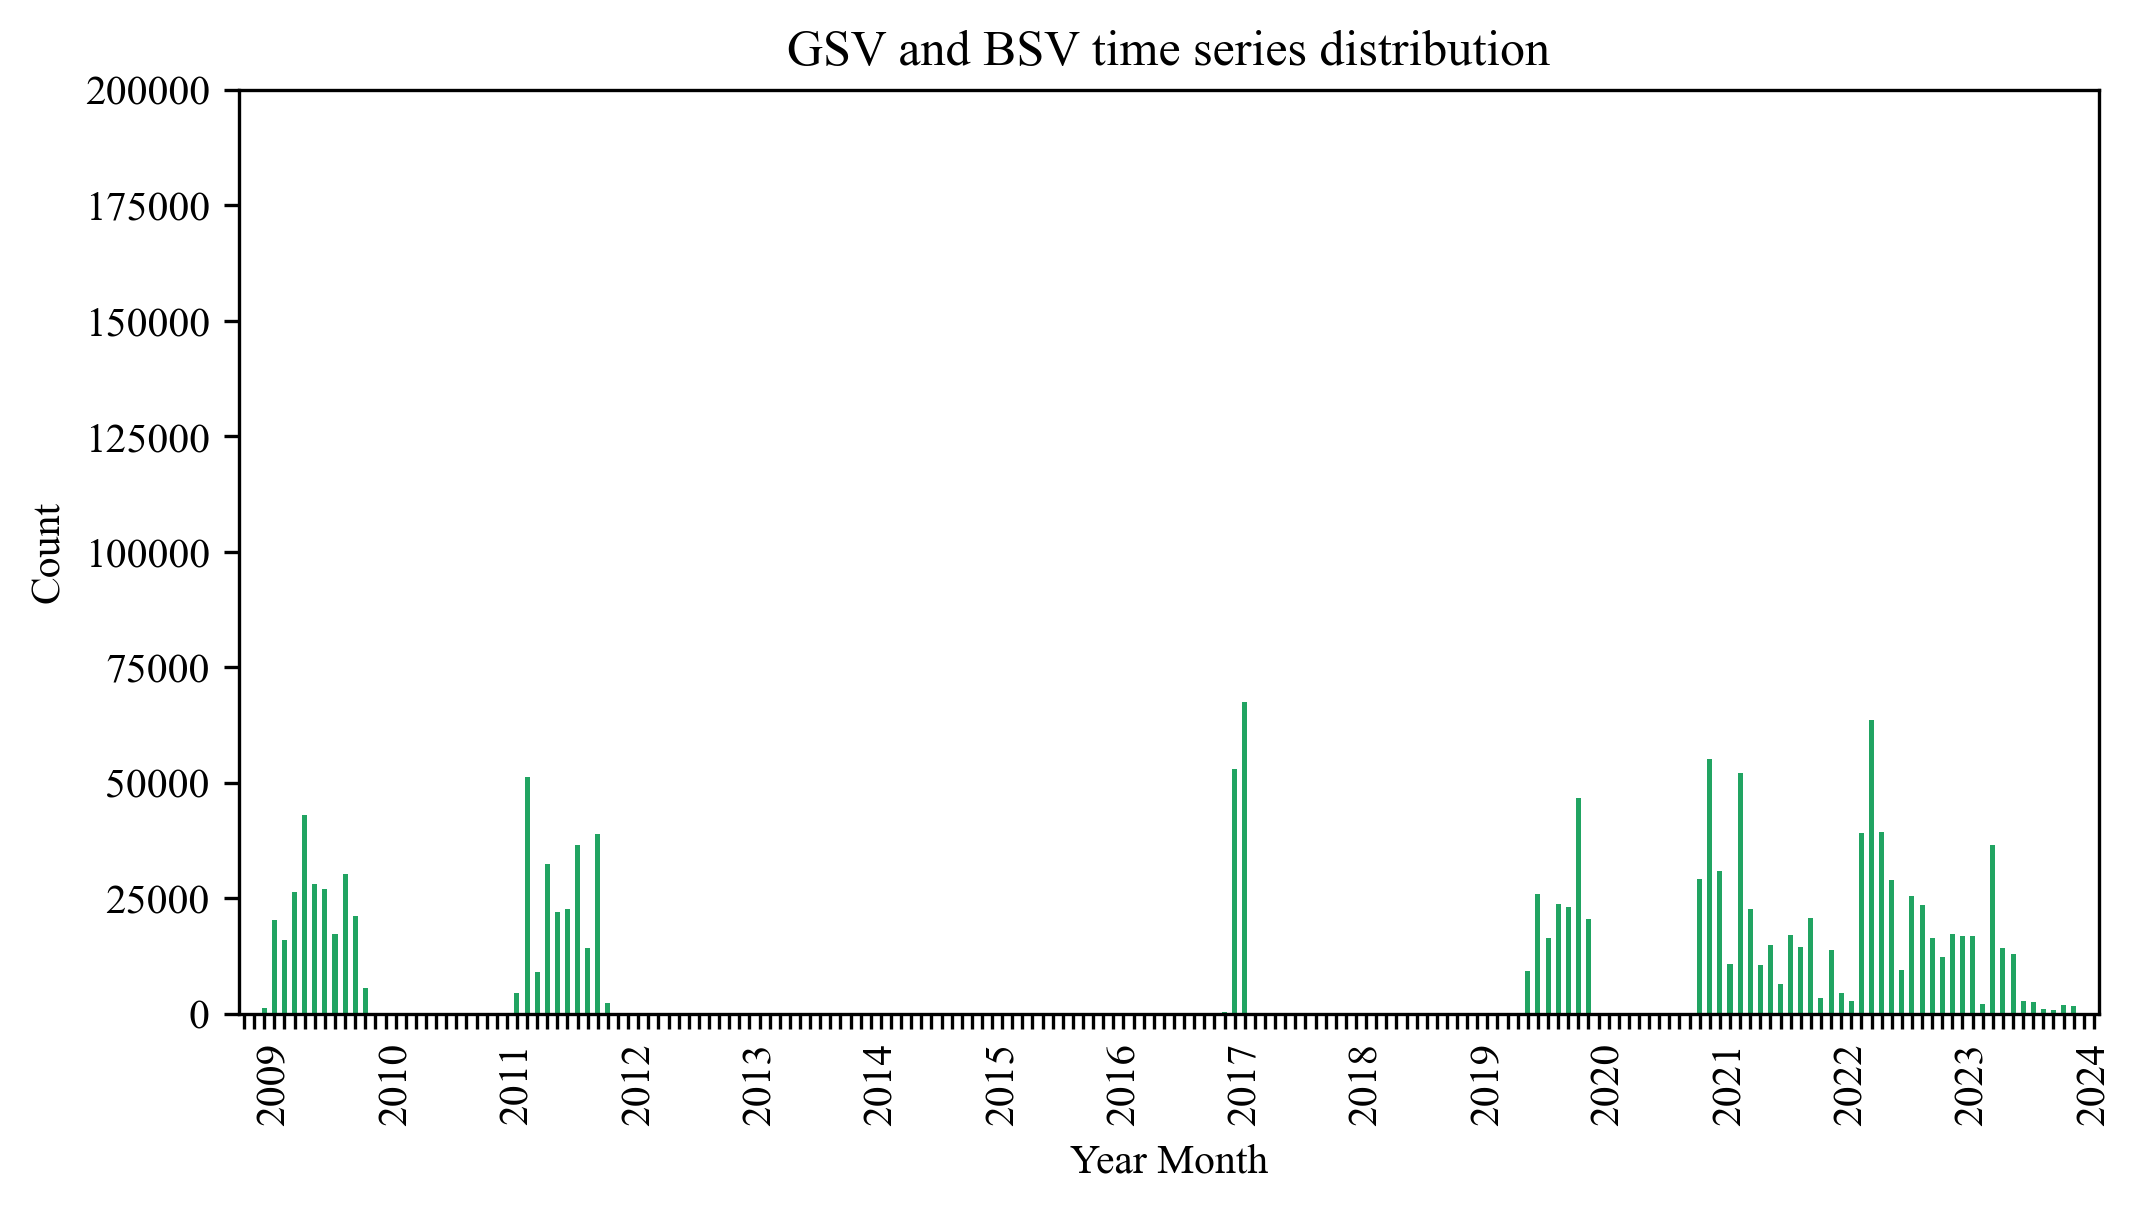

In [62]:
# 加载 CSV 文件
file_path = './data/google_angle_timeline_modified.csv'
data = pd.read_csv(file_path)

# 将 'year_month' 列转换为 datetime 格式，假设日期格式为 YYYYMM
data['datetime'] = pd.to_datetime(data['year_month'], format='%Y%m')

# 按年份分组数据，用于绘图
data_grouped = data.groupby(data['datetime'].dt.to_period('M')).size()

# 创建一个绘图数据的时间范围，从最早的月份到最晚的月份
# time_range = pd.period_range(data['datetime'].min(), data['datetime'].max(), freq='M')
print(data['datetime'].min(),data['datetime'].max())
time_range = pd.period_range('2008-10-01 00:00:00','2024-01-01 00:00:00', freq='M')


# 创建一个用于绘图的 DataFrame，即使数据集中没有某些月份，也包括所有月份
plot_data = pd.Series(index=time_range, data=0)  # 将所有计数初始化为 0
plot_data.update(data_grouped)  # 使用实际计数更新


# 绘制柱状图
plt.figure(figsize=(8, 4), dpi=300)
plot_data.plot(kind='bar', color='#21a462')

# 设置 x 轴标签仅显示年份
plt.xticks(ticks=range(len(time_range)), labels=[date.strftime('%Y') if date.month == 1 else '' for date in time_range], rotation=45)

plt.xlabel('Year Month')
plt.ylabel('Count')
plt.title('GSV and BSV time series distribution')
plt.xticks(rotation=90)
plt.grid(False)
# 设置 y 轴的取值范围
plt.ylim(0, 200000)

# 显示绘图
plt.show()


## 绘制baidu进行叠加

2013-11-01 00:00:00 2022-01-01 00:00:00


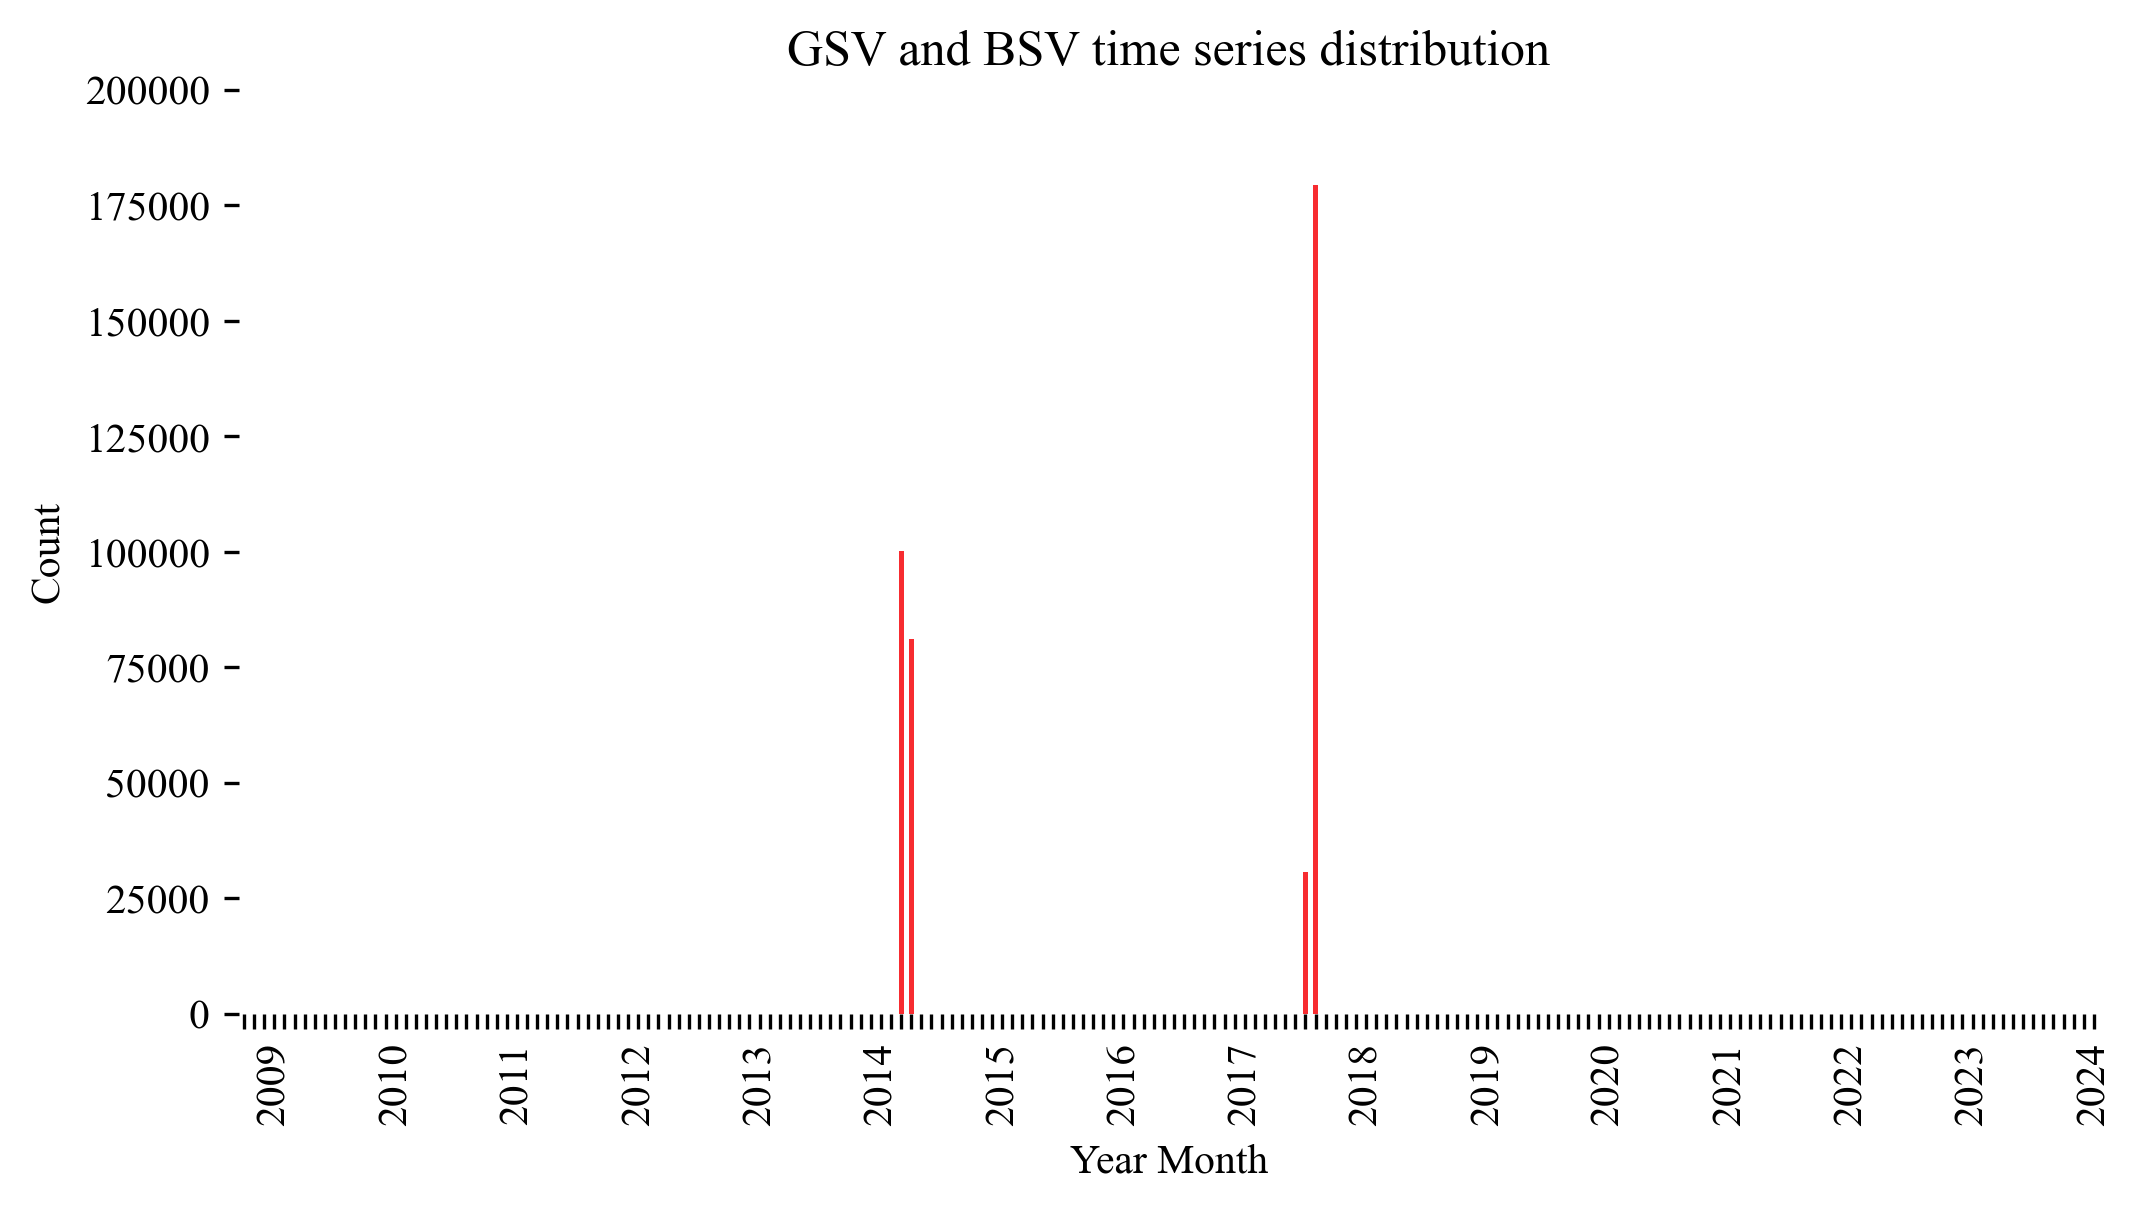

In [65]:
# 加载 CSV 文件
file_path = './data/baidu_angle_timeline_modified.csv'
data = pd.read_csv(file_path)

# 将 'year_month' 列转换为 datetime 格式，假设日期格式为 YYYYMM
data['datetime'] = pd.to_datetime(data['year_month'], format='%Y%m')

# 按年份分组数据，用于绘图
data_grouped = data.groupby(data['datetime'].dt.to_period('M')).size()

# 创建一个绘图数据的时间范围，从最早的月份到最晚的月份
# time_range = pd.period_range(data['datetime'].min(), data['datetime'].max(), freq='M')
print(data['datetime'].min(),data['datetime'].max())
time_range = pd.period_range('2008-10-01 00:00:00','2024-01-01 00:00:00', freq='M')


# 创建一个用于绘图的 DataFrame，即使数据集中没有某些月份，也包括所有月份
plot_data = pd.Series(index=time_range, data=0)  # 将所有计数初始化为 0
plot_data.update(data_grouped)  # 使用实际计数更新


# 绘制柱状图
plt.figure(figsize=(8, 4), dpi=300)
plot_data.plot(kind='bar', color='#f72c30')

# 设置 x 轴标签仅显示年份
plt.xticks(ticks=range(len(time_range)), labels=[date.strftime('%Y') if date.month == 1 else '' for date in time_range], rotation=45)

plt.xlabel('Year Month')
plt.ylabel('Count')
plt.title('GSV and BSV time series distribution')
plt.xticks(rotation=90)
plt.grid(False)
# 设置 y 轴的取值范围
plt.ylim(0, 200000)


# 移除四周的边框
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# 显示绘图
plt.show()


# fig9

## 绘图

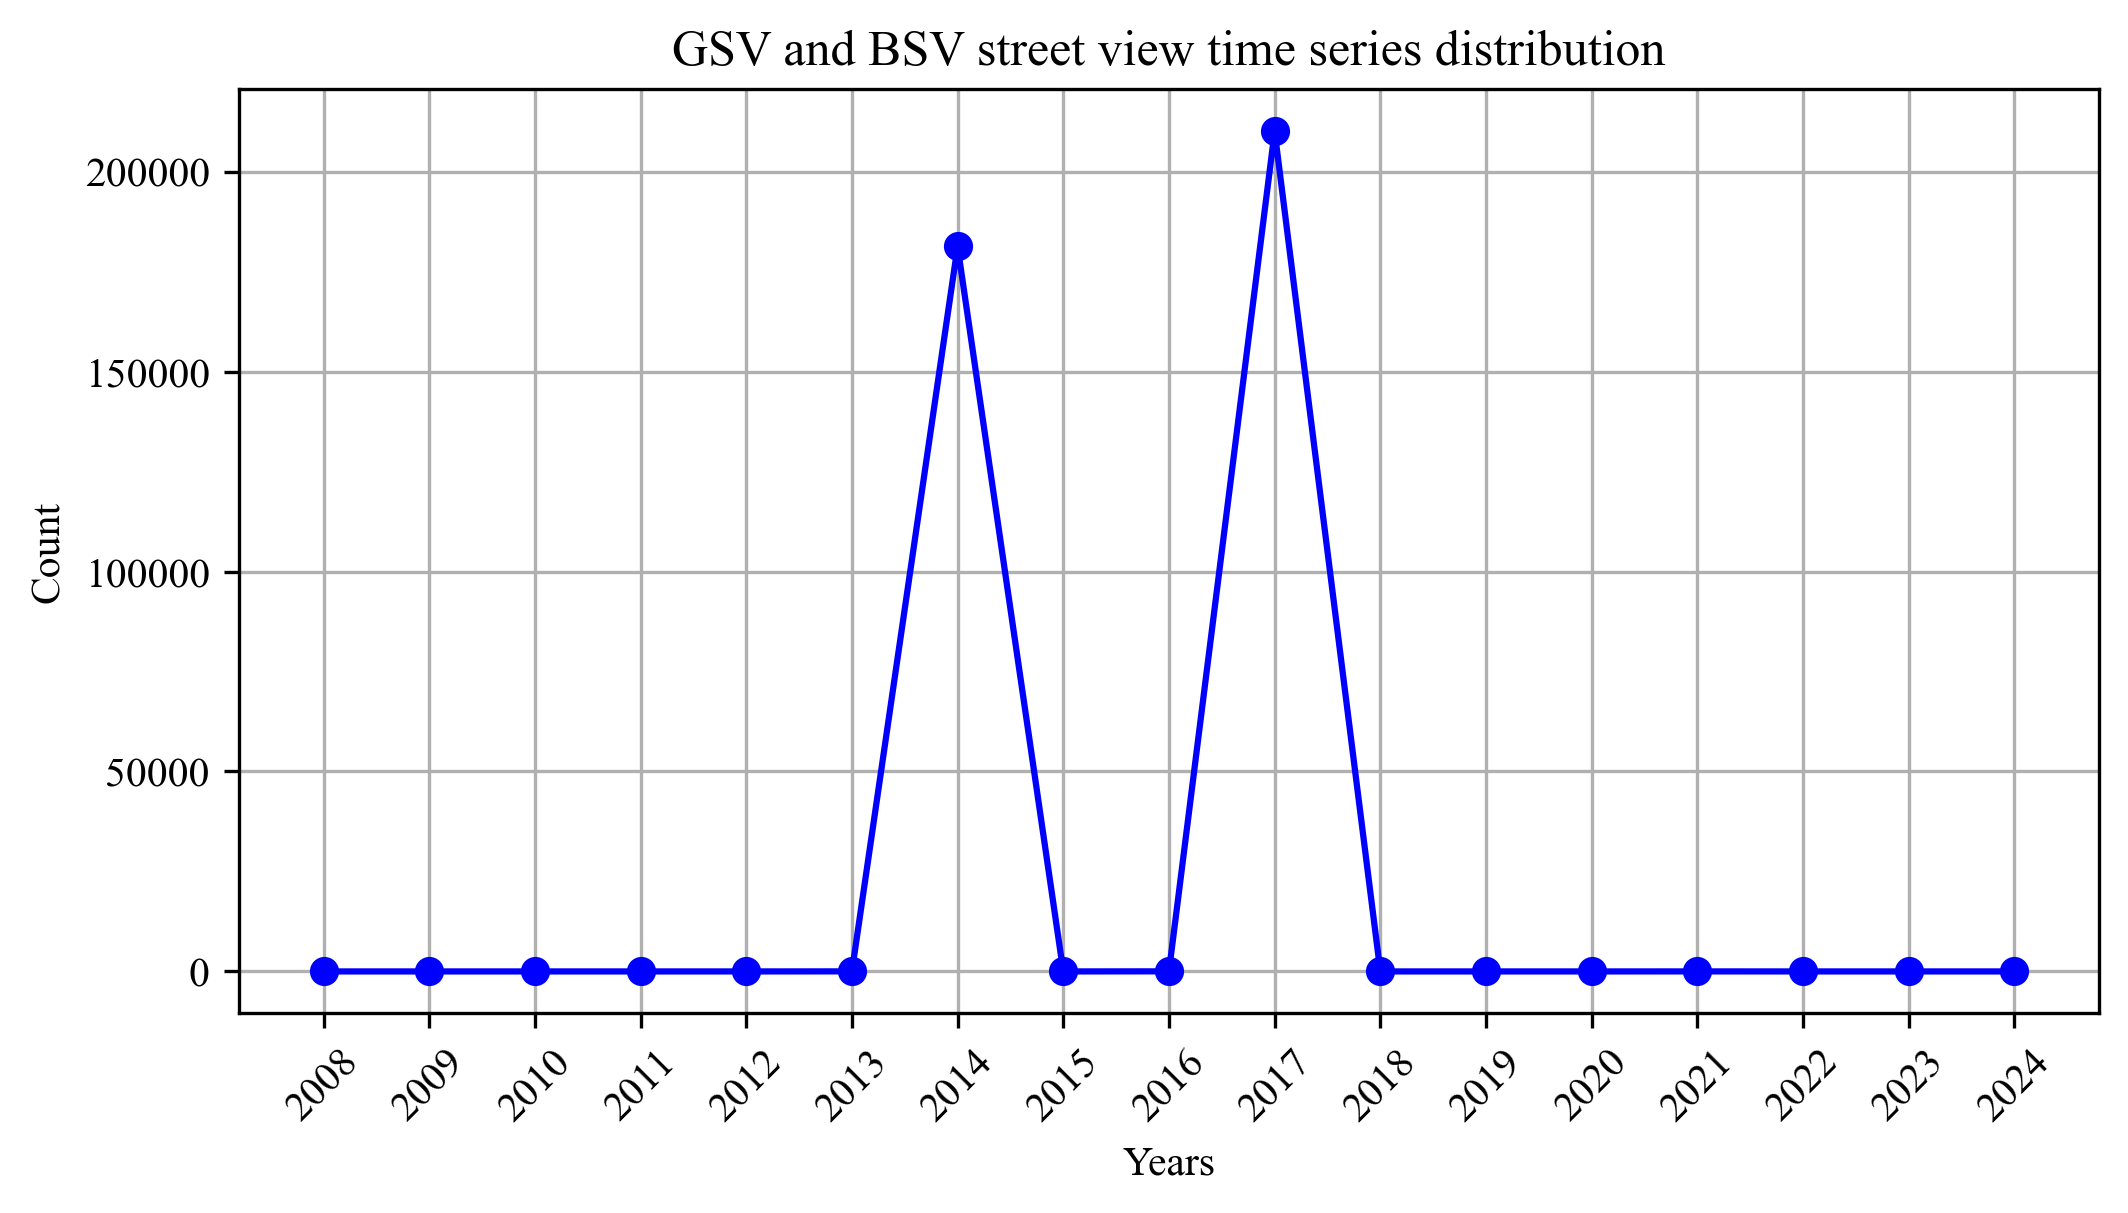

In [52]:
# 加载 CSV 文件
file_path = './data/baidu_angle_timeline_modified.csv'
data = pd.read_csv(file_path)

# 将 'new_date' 列转换为 datetime 格式，假设日期格式为 YYYYMM
data['datetime'] = pd.to_datetime(data['year_month'], format='%Y%m')

# 按年份分组数据，用于绘图
data_grouped = data.groupby(data['datetime'].dt.year).size()

# 创建一个从 2008 到 2024 年的年份范围
years = range(2008, 2025)

# 创建一个用于绘图的 DataFrame，即使数据集中没有某些年份，也包括所有年份
plot_data = pd.Series(index=years, data=0)  # 将所有计数初始化为 0
plot_data.update(data_grouped)  # 使用实际计数更新

# 绘制折线图
plt.figure(figsize=(12, 6),dpi=300)
plt.plot(plot_data, marker='o', linestyle='-', color='blue')
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('GSV and BSV street view time series distribution')
plt.xticks(ticks=years, rotation=45)
plt.grid()


# 显示绘图
plt.show()


## 绘制两个平台

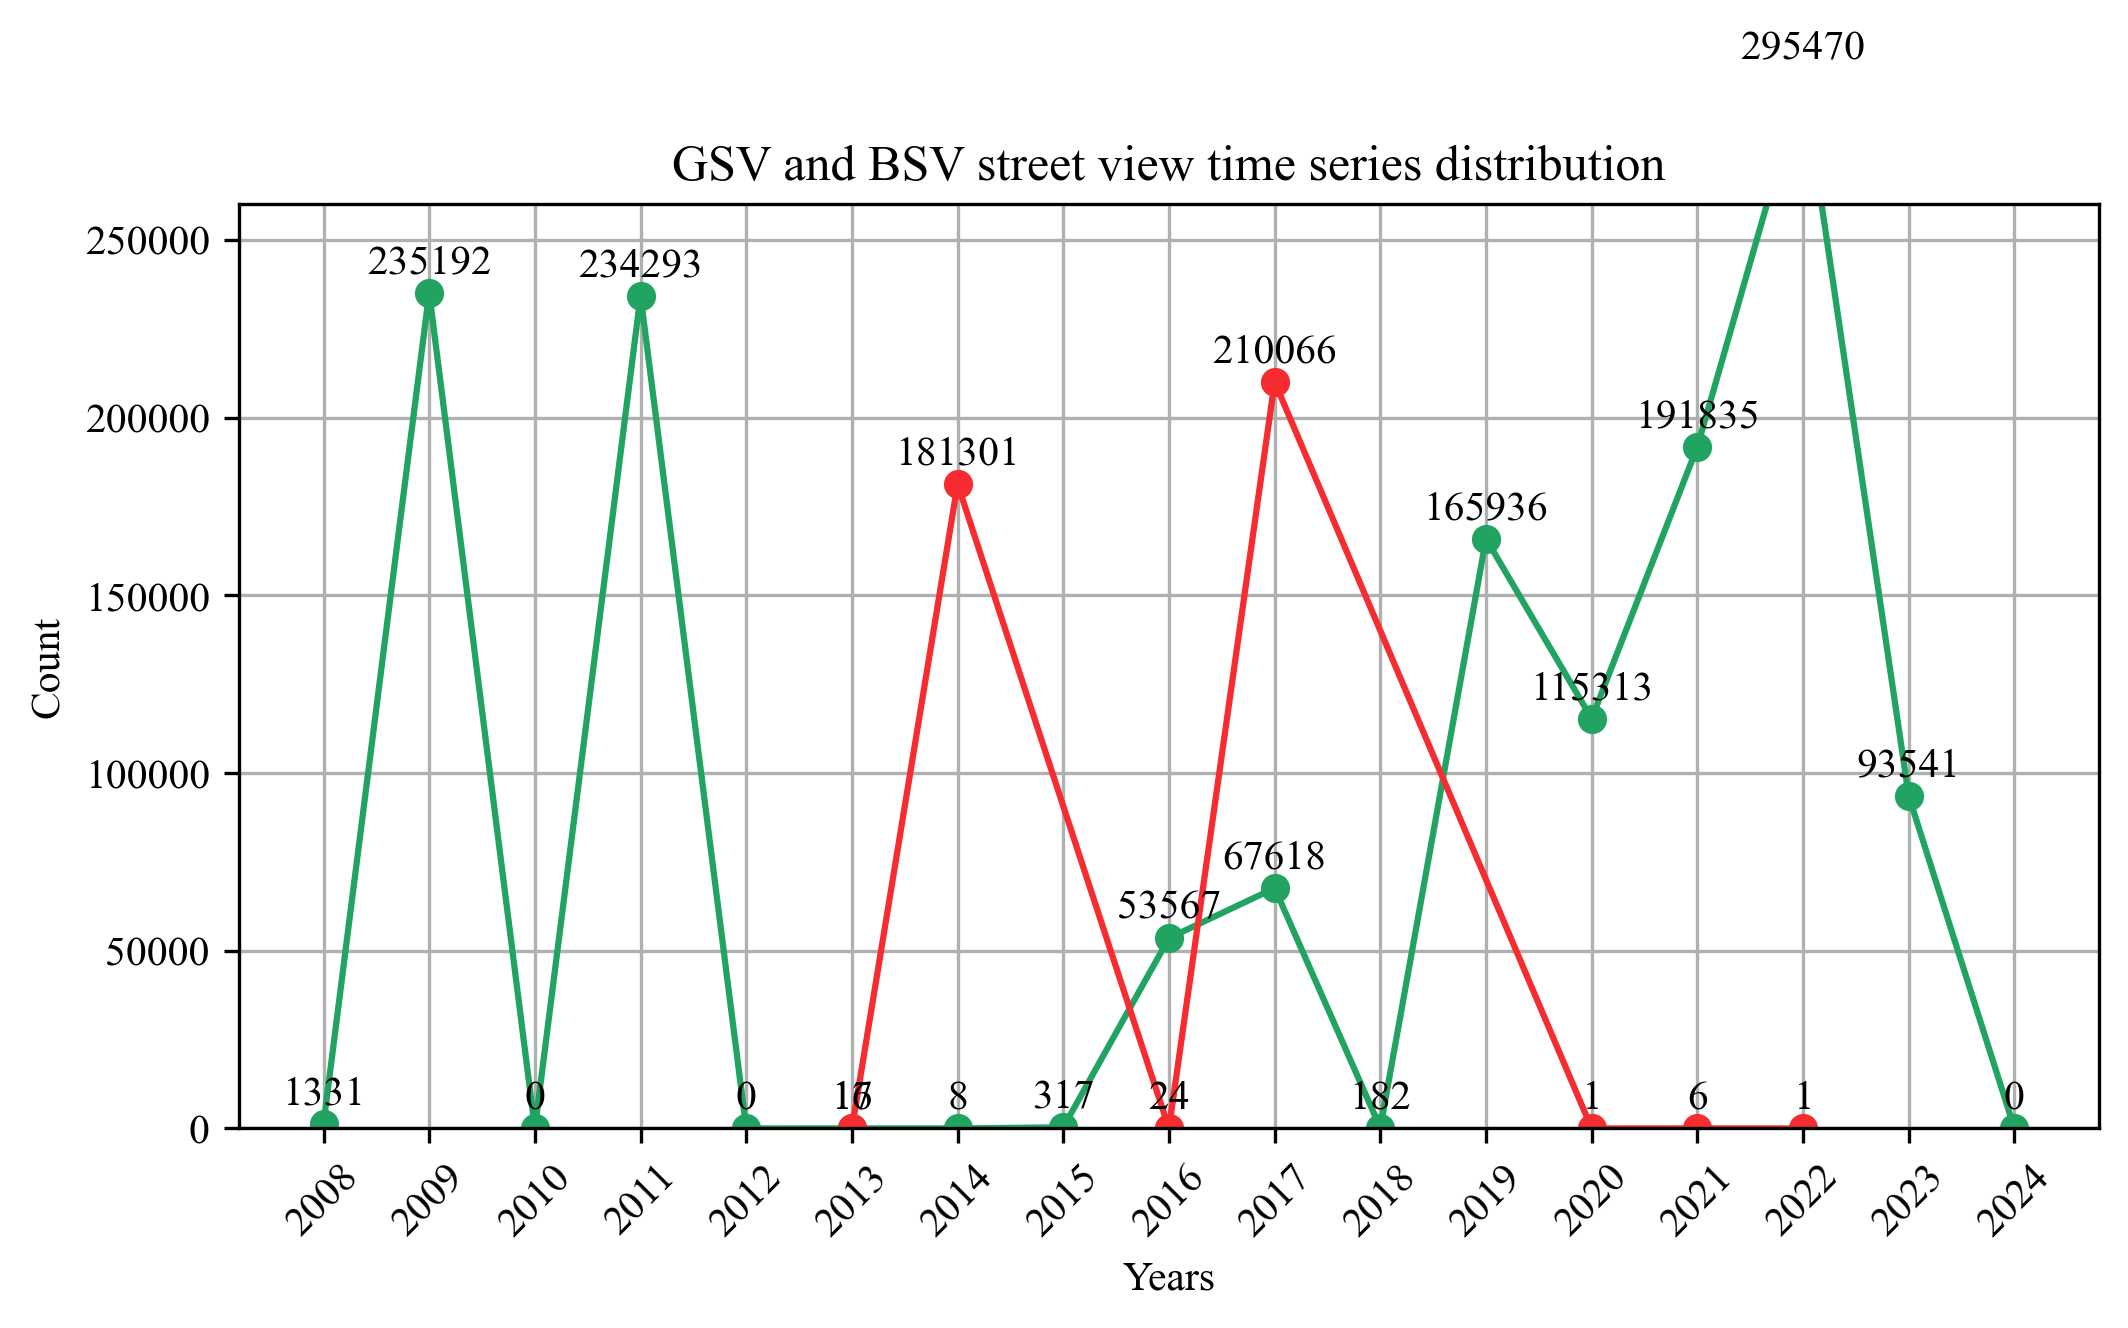

In [17]:
# google
google_path = './data/google_angle_timeline_modified.csv'  # 加载 CSV 文件
google_data = pd.read_csv(google_path)
google_data['datetime'] = pd.to_datetime(google_data['year_month'], format='%Y%m')  # 将 'new_date' 列转换为 datetime 格式，假设日期格式为 YYYYMM
google_data_grouped = google_data.groupby(google_data['datetime'].dt.year).size()  # 按年份分组数据，用于绘图

# baidu
baidu_path = './data/baidu_angle_timeline_modified.csv'  # 加载 CSV 文件
baidu_data = pd.read_csv(baidu_path)
baidu_data['datetime'] = pd.to_datetime(baidu_data['year_month'], format='%Y%m')  # 将 'new_date' 列转换为 datetime 格式，假设日期格式为 YYYYMM
baidu_data_grouped = baidu_data.groupby(baidu_data['datetime'].dt.year).size()  # 按年份分组数据，用于绘图

# 创建一个从 2008 到 2024 年的年份范围
years = range(2008, 2025)

# 创建一个用于绘图的 DataFrame，即使数据集中没有某些年份，也包括所有年份
plot_data = pd.Series(index=years, data=0)  # 将所有计数初始化为 0
plot_data.update(google_data_grouped)  # 使用实际计数更新

# 绘制折线图
plt.figure(figsize=(8, 4),dpi=300)
plt.plot(plot_data, marker='o', linestyle='-', color='#21a462')
plt.plot(baidu_data_grouped, marker='o', linestyle='-', color='#f72c30')
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('GSV and BSV street view time series distribution')
plt.xticks(ticks=years, rotation=45)
plt.grid()

# 在每个点上添加具体的数值标签
for x, y in plot_data.items():
    plt.text(x, y+3000, str(y), ha='center', va='bottom')
for x, y in baidu_data_grouped.items():
    plt.text(x, y+3000, str(y), ha='center', va='bottom')
    
# 设置 y 轴的取值范围
plt.ylim(0, 260000)

# 显示绘图
plt.show()
